In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import trim_mean, iqr
from statistics import variance, stdev
from numpy import mean, absolute, median

# Exploratory Data Analysis (EDA)
data : https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

In [3]:
medal_count = pd.read_excel("Medals.xlsx")
medal_count

E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [4]:
# Mean

medal_count["Total"].mean()

11.612903225806452

In [7]:
# weighted

np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [11]:
# trim mean

trim_mean(medal_count["Total"], 0.1)

6.8933333333333335

In [12]:
# median

medal_count["Total"].median()

4.0

In [13]:
# Weighted Median

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

In [14]:
weighted_median(medal_count, "Total", "Gold")

40

In [17]:
# percentile

q3 = np.percentile(medal_count["Total"], 75)
print(q3)

11.0


In [18]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [20]:
# Variance

variance(medal_count["Total"])

364.47896213183736

In [23]:
# standard deviation

stdev(medal_count["Total"])

19.091332120411014

In [25]:
# mean absolute deviation

def mean_abs_dev(x):
    return mean(absolute(x - mean(x)))

In [26]:
mean_abs_dev(medal_count["Total"])

11.602497398543184

In [28]:
# median absolute deviation

def median_abs_dev(x):
    return median(absolute(x - median(x)))

In [29]:
median_abs_dev(medal_count["Total"])

3.0

In [31]:
# iqr

iqr(medal_count["Total"])

9.0

## Exploring the Data Distribution

### Percentiles and Boxplots

In [33]:
medal_count["Total"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     1.0
0.25     2.0
0.50     4.0
0.75    11.0
0.95    50.8
Name: Total, dtype: float64

<AxesSubplot:>

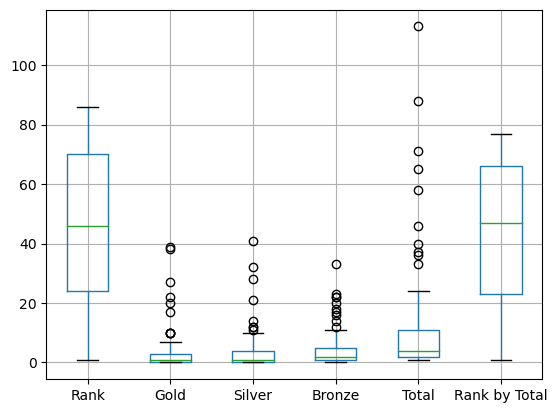

In [34]:
medal_count.boxplot()

In [35]:
# Frequency Table

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


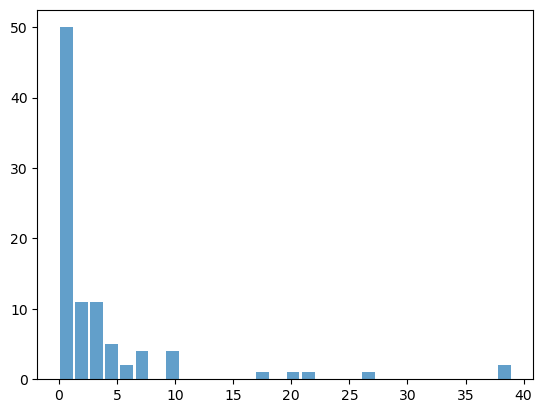

In [41]:
# Histrogram

plt.hist(x=medal_count["Gold"], bins='auto', alpha=0.7, rwidth=0.85)
plt.show()

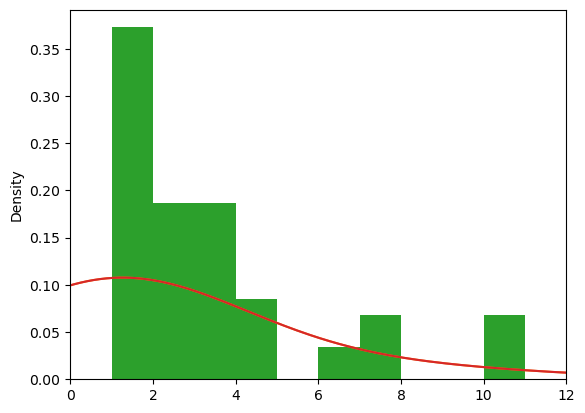

In [43]:
# Density Plot

ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
plt.show()

## Exploring Binary and Categorical Data

In [44]:
# Mode

medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

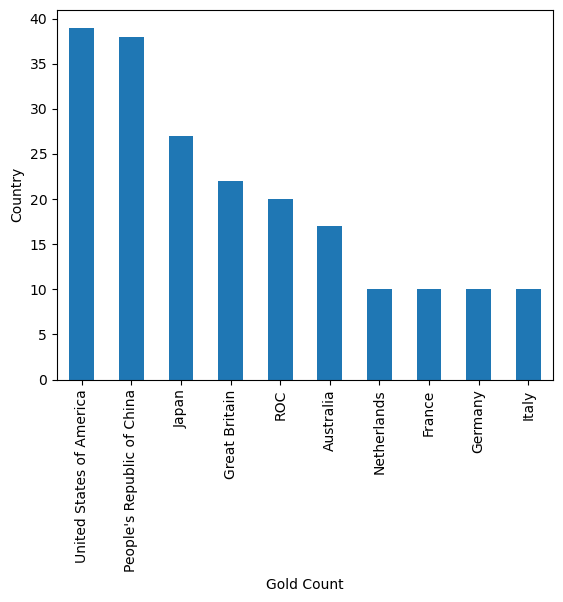

In [52]:
# plot bar

ax = medal_count.iloc[:10, :].plot.bar(x='Team/NOC', y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')
plt.show()

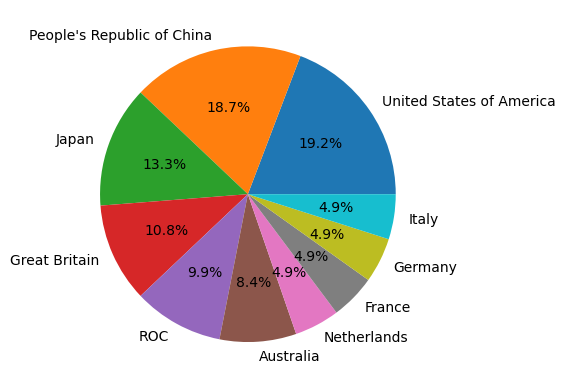

In [63]:
# Pie Chart

pie_data = medal_count.iloc[:10, :]
plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%')
plt.show()

## Exploring Two of More Variables

### Correlation

In [59]:
# Corr Matrix

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


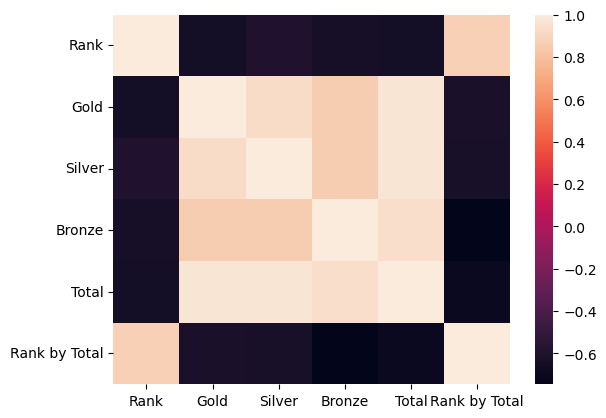

In [72]:
# Heatmap

sns.heatmap(medal_count.corr())
plt.show()

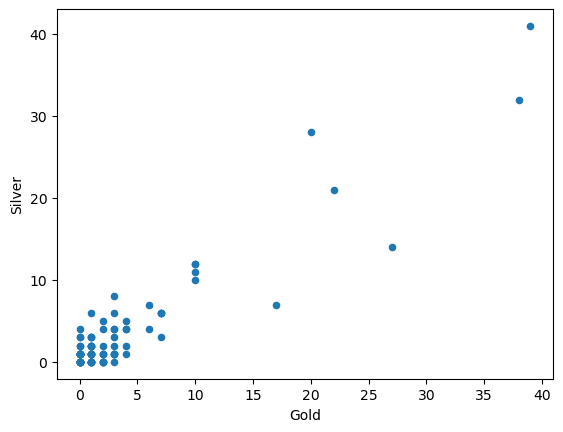

In [64]:
medal_count.plot.scatter(x="Gold", y="Silver")
plt.show()

## Num vs Num Data

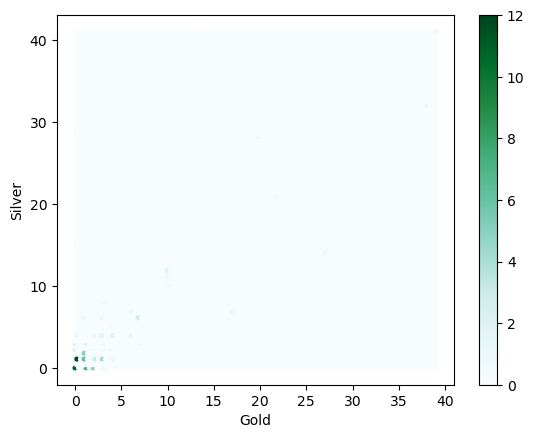

In [67]:
# hexagonal Binning

medal_count.plot.hexbin(x="Gold", y="Silver")
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


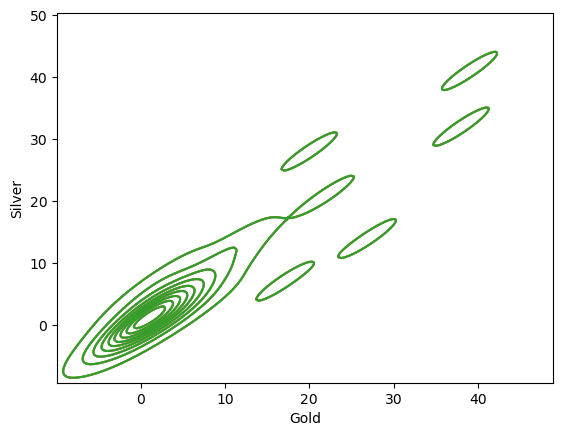

In [71]:
# Countour Plots

ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
plt.show()

## Categorical vs Categorical Variables

In [75]:
# contigency table

crosstab = medal_count[["Silver", "Gold"]].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


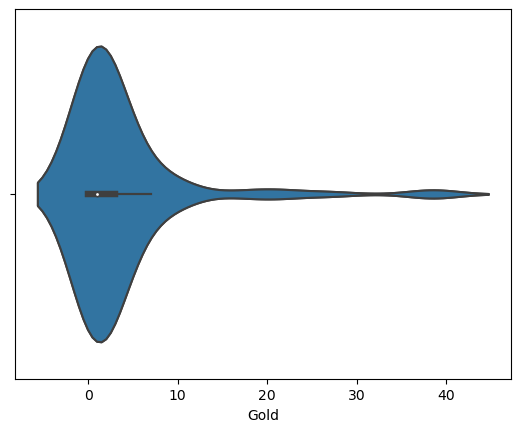

In [78]:
# violin plot

sns.violinplot(x=medal_count["Gold"])
plt.show()